# Pandas


In [1]:
python -v

NameError: name 'python' is not defined

Pandas is a library built using NumPy specifically for data analysis. You'll be using Pandas heavily for data manipulation, visualisation, building machine learning models, etc. 

There are two main data structures in Pandas - Series and Dataframes. The default way to store data is dataframes, and thus manipulating dataframes quickly is probably the most important skill set for data analysis. 

*Source: https://pandas.pydata.org/pandas-docs/stable/overview.html*

In this section, you will study:
1. The pandas Series (similar to a numpy array)
    * Creating a pandas series
    * Indexing series
2. Dataframes 
    * Creating dataframes from dictionaries
    * Importing CSV data files as pandas dataframes
    * Reading and summarising dataframes
    * Sorting dataframes 

### 1. The Pandas Series 

A series is similar to a 1-D numpy array, and contains scalar values of the same type (numeric, character, datetime etc.). 
A dataframe is simply a table where each column is a pandas series.


#### Creating Pandas Series

Series are one-dimensional array-like structures, though unlike numpy arrays, they often contain non-numeric data (characters, dates, time, booleans etc.)

You can create pandas series from array-like objects using ```pd.Series()```.

In [1]:
# import pandas, pd is an alias
import pandas as pd
import numpy as np

# Creating a numeric pandas series
s = pd.Series([2, 4, 5, 6, 9])
print(s)
print(type(s))

0    2
1    4
2    5
3    6
4    9
dtype: int64
<class 'pandas.core.series.Series'>


In [7]:

s1= pd.Series([1,2,3,4])
print(s1)
s2=pd.Series((1,2,3,4))
print(s2)

0    1
1    2
2    3
3    4
dtype: int64
0    1
1    2
2    3
3    4
dtype: int64


In [9]:
print(np.array([1,2,3]))

[1 2 3]


In [15]:
print(np.array([2,'a','b',1]))

['2' 'a' 'b' '1']


Note that each element in the Series has an index, and the index starts at 0 as usual.

In [13]:
# creating a series of characters
# notice that the 'dtype' here is 'object'
char_series = pd.Series(['a', 'b', 'af',1])
char_series

0     a
1     b
2    af
3     1
dtype: object

In [17]:
# creating a series of type datetime
date_series = pd.date_range(start = '11-09-2017', end = '12-12-2017')
date_series
type(date_series)


pandas.core.indexes.datetimes.DatetimeIndex

In [24]:
date1=pd.date_range(start='2020-12-20',end="2020-12-21")
date1
#print(date1)
#help(pd.date_range)

DatetimeIndex(['2020-12-20', '2020-12-21'], dtype='datetime64[ns]', freq='D')

#### Indexing Series

Indexing series is exactly same as 1-D numpy arrays - index starts at 0.

In [26]:
# Indexing pandas series: Same as indexing 1-d numpy arrays or lists
# accessing the fourth element
s[3]

6

In [31]:
# accessing elements starting index = 2 till the end
s[2:]

2    5
3    6
4    9
dtype: int64

In [29]:
char_series[1:]

1     b
2    af
3     1
dtype: object

In [33]:
# accessing the second and the fourth elements
# note that s[1, 3] will not work, you need to pass the indices [1, 3] as a list inside the original []
s[[1, 3]]

1    4
3    6
dtype: int64

In [35]:
s.apply(lambda x:x**2)

0     4
1    16
2    25
3    36
4    81
dtype: int64

In [36]:
np.arange(10).apply(lambda x:x**2)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

#### Explicitly specifying indices

You might have noticed that while creating a series, Pandas automatically indexes it from 0 to (n-1), n being the number of rows. But if we want, we can also explicitly set the index ourselves, using the ‘index’ argument while creating the series using `pd.Series()`

In [37]:
# Indexing explicitly
pd.Series([0, 1, 2], index = ['a', 'b', 'c'])

a    0
b    1
c    2
dtype: int64

In [43]:
pd.Series([1,5,10], index=['I',0,'X'])

I     1
0     5
X    10
dtype: int64

In [42]:
# You can also give the index as a sequence or use functions to specify the index
# But always make sure that the number of elements in the index list is equal to the number of elements specified in the series

pd.Series(np.array(range(0,10))**2, index = range(0,10))

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int32

Usually, you will work with Series only as a part of dataframes. Let's study the basics of dataframes.

### The Pandas Dataframe

Dataframe is the most widely used data-structure in data analysis. It is a table with rows and columns, with rows having an index and columns having meaningful names.

#### Creating dataframes from dictionaries

There are various ways of creating dataframes, such as creating them from dictionaries, JSON objects, reading from txt, CSV files, etc. 

In [53]:
# keys become column names
df = pd.DataFrame({'name': ['Vinay', 'Kushal', 'Aman', 'Saif'], 
                   'age': [22, 25, 24, 28], 
                    'occupation': ['engineer', 'doctor', 'data analyst', 'teacher']})
df

,name,age,occupation
0,Vinay,22,engineer
1,Kushal,25,doctor
2,Aman,24,data analyst
3,Saif,28,teacher


In [58]:
df1=pd.DataFrame({'name': ['Anand','Aditya','Mondal'],'age':[28,27,28],'occupation':['Api Engineer','SDE 2','PhD Scholar']})
(df1)

,name,age,occupation
0,Anand,28,Api Engineer
1,Aditya,27,SDE 2
2,Mondal,28,PhD Scholar


In [52]:
dict={'name': 'Anand','occupation':'Java Developer','age':28}
dict1={'name': 'Aditya','occupation':'SDEII','age':28}
dict2={'name': 'Mondal','occupation':'PHD scholar','age':28}
print(dict)
print(dict1)
print(dict2['name'])

{'name': 'Anand', 'occupation': 'Java Developer', 'age': 28}
{'name': 'Aditya', 'occupation': 'SDEII', 'age': 28}
Mondal


In [51]:
df=pd.DataFrame(dict)

ValueError: If using all scalar values, you must pass an index

#### Importing CSV data files as pandas dataframes 

For the upcoming exercises, we will use a dataset of a retail store having details about the orders placed, customers, product details, sales, profits etc. 



In [59]:
# reading a CSV file as a dataframe
market_df = pd.read_csv("global_sales_data/market_fact.csv")

Usually, dataframes are imported as CSV files, but sometimes it is more convenient to convert dictionaries 
into dataframes. For e.g. when the raw data is in a JSON format (which is not uncommon), you can easily convert it into a dictionary, and then into a dataframe. 

You will learn how to convert JSON objects to dataframes later.

#### Reading and Summarising Dataframes

After you import a dataframe, you'd want to quickly understand its structure, shape, meanings of rows and columns etc. Further, you may want to look at summary statistics - such as mean, percentiles etc.

In [61]:
# Looking at the top and bottom entries of dataframes
market_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [62]:
market_df.tail()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,3872.8700,0.03,23,565.34,30.00,0.62
8398,Ord_5459,Prod_6,SHP_7628,Cust_1798,603.6900,0.00,47,131.39,4.86,0.38


Here, each row represents an order placed at a retail store. Notice the index associated with each row - starts at 0 and ends at 8398, implying that there were 8399 orders placed.

In [63]:
# Looking at the datatypes of each column
market_df.info()

# Note that each column is basically a pandas Series of length 8399
# The ID columns are 'objects', i.e. they are being read as characters
# The rest are numeric (floats or int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ord_id               8399 non-null   object 
 1   Prod_id              8399 non-null   object 
 2   Ship_id              8399 non-null   object 
 3   Cust_id              8399 non-null   object 
 4   Sales                8399 non-null   float64
 5   Discount             8399 non-null   float64
 6   Order_Quantity       8399 non-null   int64  
 7   Profit               8399 non-null   float64
 8   Shipping_Cost        8399 non-null   float64
 9   Product_Base_Margin  8336 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 656.3+ KB


In [64]:
# Describe gives you a summary of all the numeric columns in the dataset
market_df.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


In [74]:
#?market_df.describe
?market_df.columns

In [83]:
# Column names
market_df.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')

In [84]:
# The number of rows and columns
market_df.shape

(8399, 10)

In [85]:
# You can extract the values of a dataframe as a numpy array using df.values 
market_df.values

array([['Ord_5446', 'Prod_16', 'SHP_7609', ..., -30.51, 3.6, 0.56],
       ['Ord_5406', 'Prod_13', 'SHP_7549', ..., 4.56, 0.93, 0.54],
       ['Ord_5446', 'Prod_4', 'SHP_7610', ..., 1148.9, 2.5, 0.59],
       ...,
       ['Ord_5388', 'Prod_6', 'SHP_7524', ..., -70.85, 5.35, 0.4],
       ['Ord_5348', 'Prod_15', 'SHP_7469', ..., 565.34, 30.0, 0.62],
       ['Ord_5459', 'Prod_6', 'SHP_7628', ..., 131.39, 4.86, 0.38]],
      dtype=object)

#### Indices 

An important concept in pandas dataframes is that of *row indices*. By default, each row is assigned indices starting from 0, and are represented at the left side of the dataframe. 

In [86]:
market_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [88]:
df1=market_df

In [90]:
df1.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [91]:
df1.set_index("Ord_id")

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54
Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
...,...,...,...,...,...,...,...,...,...
Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59
Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37
Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40


In [94]:
df1.set_index("Ord_id",inplace=True)

KeyError: "None of ['Ord_id'] are in the columns"

In [95]:
df1.head()

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


Now, arbitrary numeric indices are difficult to read and work with. Thus, you may want to change the indices of the df to something more meanigful.

Let's change the index to Ord_id (unique id of each order), so that you can select rows using the order ids directly.

In [97]:
# Setting index to Ord_id
#market_df.set_index('Ord_id', inplace = True)
market_df.head()

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


Having meaningful row labels as indices helps you to select (subset) dataframes easily. You will study selecting dataframes in the next section. 

#### Sorting dataframes

You can sort dataframes in two ways - 1) by the indices and 2) by the values.  


In [98]:
# Sorting by index
# axis = 0 indicates that you want to sort rows (use axis=1 for columns)
market_df.sort_index(axis = 0, ascending = False)

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_999,Prod_15,SHP_1383,Cust_361,5661.08,0.00,33,1055.47,30.00,0.62
Ord_998,Prod_8,SHP_1380,Cust_372,750.66,0.00,33,120.05,4.00,0.60
Ord_998,Prod_5,SHP_1382,Cust_372,2149.37,0.03,42,217.87,19.99,0.55
Ord_998,Prod_8,SHP_1381,Cust_372,254.32,0.01,8,-117.39,6.50,0.79
Ord_997,Prod_14,SHP_1379,Cust_365,28761.52,0.04,8,285.11,24.49,0.37
...,...,...,...,...,...,...,...,...,...
Ord_1001,Prod_5,SHP_1385,Cust_374,1981.26,0.07,49,100.80,8.66,0.76
Ord_1000,Prod_6,SHP_1384,Cust_373,334.71,0.01,25,31.74,6.47,0.38
Ord_100,Prod_8,SHP_138,Cust_58,121.12,0.10,3,-118.82,1.99,0.44


In [21]:
# Sorting by values

# Sorting in increasing order of Sales
market_df.sort_values(by='Sales').head()

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_704,Prod_7,SHP_964,Cust_242,2.24,0.01,1,-1.97,0.70,0.37
Ord_149,Prod_3,SHP_7028,Cust_1712,3.20,0.09,1,-3.16,1.49,0.37
Ord_4270,Prod_7,SHP_5959,Cust_1450,3.23,0.06,2,-2.73,0.70,0.81
Ord_4755,Prod_13,SHP_6628,Cust_1579,3.41,0.06,1,-1.78,0.70,0.56
Ord_2252,Prod_3,SHP_3064,Cust_881,3.42,0.05,1,-2.91,1.49,0.37


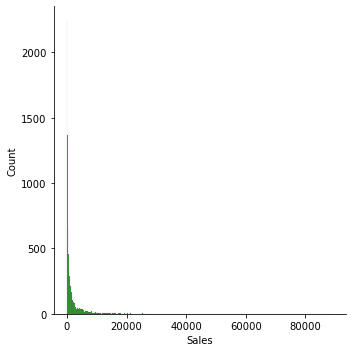

In [106]:
import seaborn as sns
sns.displot(market_df['Sales'],color="g")


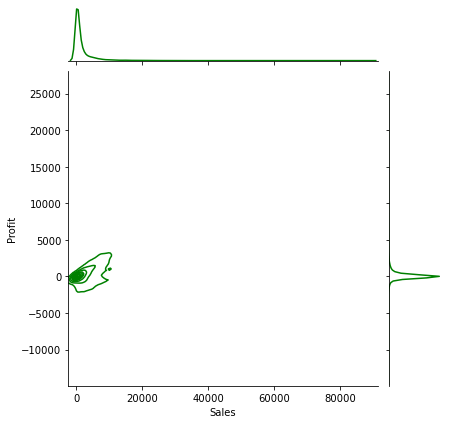

In [113]:
import matplotlib.pyplot as plt
sns.jointplot(market_df.Sales, market_df.Profit, kind = 'kde',color = 'g')

In [ ]:
plt.join

In [101]:
# Sorting in decreasing order of Shipping_Cost
market_df.sort_values(by='Shipping_Cost', ascending = False).head()

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_1751,Prod_15,SHP_2426,Cust_597,14740.510,0.00,46,3407.73,164.73,0.56
Ord_839,Prod_11,SHP_1361,Cust_364,12689.870,0.04,44,-169.23,154.12,0.76
Ord_1741,Prod_11,SHP_2411,Cust_595,15168.820,0.02,26,-1096.78,147.12,0.80
Ord_417,Prod_11,SHP_561,Cust_156,20333.816,0.02,45,-1430.45,147.12,0.80
Ord_1581,Prod_15,SHP_2184,Cust_519,2573.920,0.07,17,117.23,143.71,0.55


In [23]:
# Sorting by more than two columns

# Sorting in ascending order of Sales for each Product
market_df.sort_values(by=['Prod_id', 'Sales'], ascending = False)

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_2197,Prod_9,SHP_2994,Cust_827,7522.80,0.04,48,3187.37,19.99,0.39
Ord_4356,Prod_9,SHP_6074,Cust_1481,6831.72,0.01,41,3081.02,19.99,0.39
Ord_262,Prod_9,SHP_358,Cust_66,6553.45,0.03,39,2969.81,19.99,0.39
Ord_4059,Prod_9,SHP_5660,Cust_1378,5587.20,0.05,36,2254.16,19.99,0.39
Ord_2973,Prod_9,SHP_6073,Cust_1480,5410.95,0.09,36,2077.91,19.99,0.39
Ord_950,Prod_9,SHP_1315,Cust_334,4906.85,0.09,32,1907.94,19.99,0.39
Ord_5112,Prod_9,SHP_7141,Cust_1729,4273.95,0.05,49,1340.07,19.99,0.40
Ord_612,Prod_9,SHP_836,Cust_687,3872.38,0.10,50,1110.35,19.99,0.38
Ord_3443,Prod_9,SHP_4773,Cust_1246,3849.17,0.06,46,1982.78,5.01,0.38
